<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/ProblemarioUNIDAD_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [1]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('tiempo ~ C(metodo)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


Se rechaza ho, por lo tanto si hay relación entre variables, el metodo si esta modificando el tiempo

In [3]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.2808008139238357


No se rechaza ho, por lo tanto hay normalidad

In [4]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.4485146502776487


No se rechaza ho, por lo tanto hay homoscedasticidad

Hay independencia ya que son distintos metodos

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

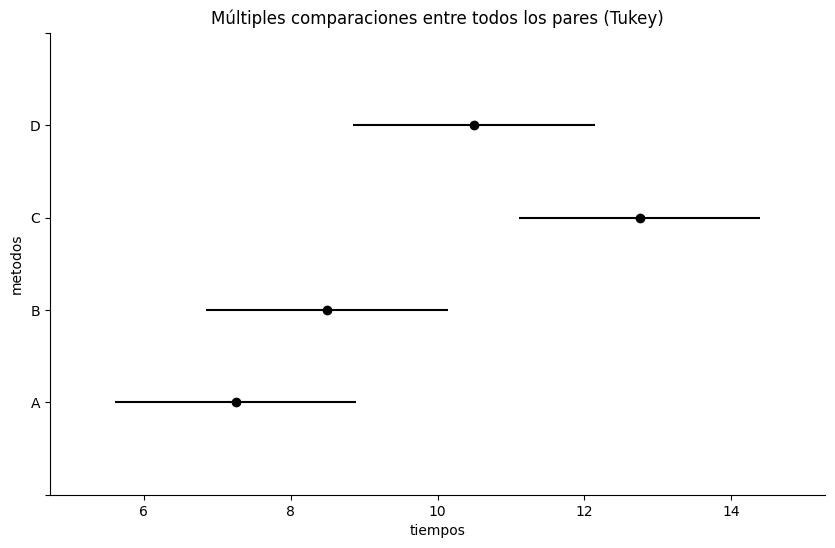

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="metodos", xlabel="tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Nos podriamos quedar con los metodos A B y D. ya que C si tiene diferencia significativa respecto a A

In [6]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(metodo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.702


2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [7]:
import pandas as pd
from io import StringIO

datos = '''
cuero,observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,cuero,observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('observaciones ~ C(cuero)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(cuero),3.0,7019.458333,2339.819444,22.755356,0.000001
Residual,20.0,2056.500000,102.825000,NaN,NaN


Se rechaza ho, por lo tanto si hay relación entre variables

In [9]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.00967014513830024


Se rechaza ho, por lo tanto no hay normalidad

In [10]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['cuero'] == 'A']['observaciones']
grupo2 = df[df['cuero'] == 'B']['observaciones']
grupo3 = df[df['cuero'] == 'C']['observaciones']
grupo4 = df[df['cuero'] == 'D']['observaciones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.6351342635286297


No se rechaza ho, por lo tanto hay homoscedasticidad

Como Anova nos indica que hay relacion entre las variables pero no se cumple con el supuesto de normalidad deberemos usar el metodo de boxcox

Lambda óptimo: -3.707788382033557


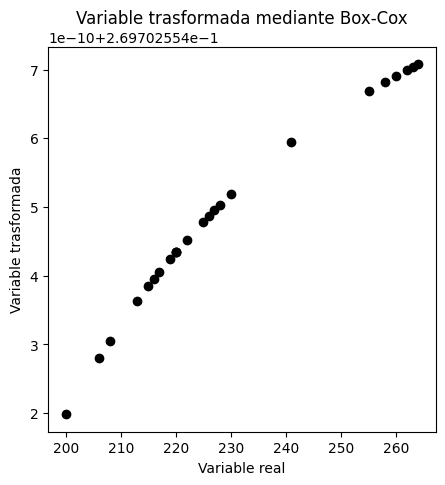

In [11]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["observaciones_boxcox"], lambda_opt = boxcox(df["observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["observaciones"], df["observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [12]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('observaciones_boxcox ~ C(cuero)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(cuero),3.0,3.735520e-19,1.245173e-19,23.368223,9.595693e-07
Residual,20.0,1.065698e-19,5.328489e-21,NaN,NaN


Rechaza ho, hay relacion entre las variables

In [13]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.4576953738713335


No se rechaza ho, ahora ya hay  normalidad

In [14]:
from scipy.stats import levene
# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['cuero'] == 'A']['observaciones_boxcox']
grupo2 = df[df['cuero'] == 'B']['observaciones_boxcox']
grupo3 = df[df['cuero'] == 'C']['observaciones_boxcox']
grupo4 = df[df['cuero'] == 'D']['observaciones_boxcox']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#ya se cumplio ahora ambos supuestos, la normalidad y la homoscedasticidad para
#saber que anova esta en lo cierto y si hay relacion entre las variables

p-valor de Levene: 0.3428159311494669


No se rechaza ho, por lo tanto hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -0.0    0.0  -0.0  -0.0   True
     A      C     -0.0 0.0048  -0.0  -0.0   True
     A      D     -0.0 0.0001  -0.0  -0.0   True
     B      C      0.0 0.0018   0.0   0.0   True
     B      D      0.0 0.0613  -0.0   0.0  False
     C      D     -0.0  0.401  -0.0   0.0  False
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

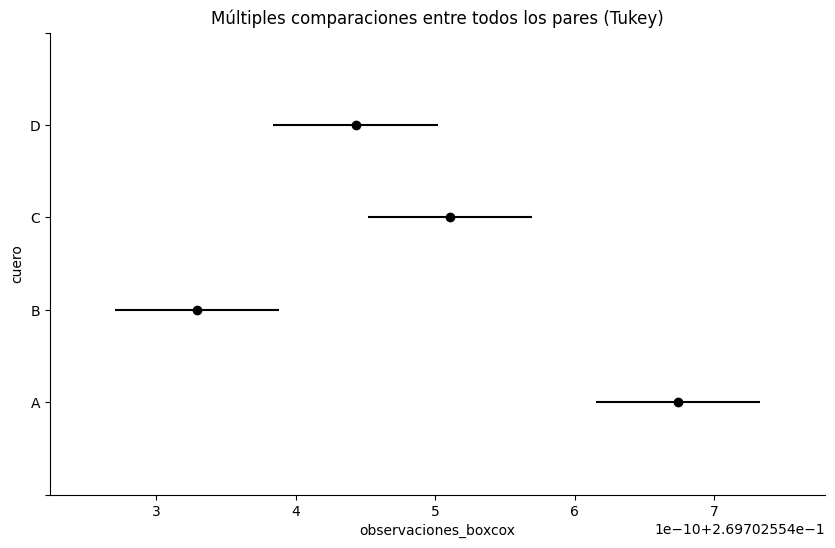

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['observaciones_boxcox'], groups=df['cuero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="cuero", xlabel="observaciones_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Hay dos cueros los cuales son buenos y son el B y el D, los otros no porque tienen diferencia significativa con el cuero B.
Aunque el más recomendable es utilizar el cuero B debido a su durabilidad

In [16]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(cuero)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.778


3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [17]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,coccion
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,tratamiento,coccion
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('coccion ~ C(tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay diferencia entre grupos, no hay relacion entre tiempo de coccion y el tratamiento
#Hi: si hay relación entre grupos, si hay relacion entre coccion y tratamiento
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),3.0,95041.250000,31680.416667,1558.966022,1.260640e-27
Residual,24.0,487.714286,20.321429,NaN,NaN


Se rechaza Ho, por lo tanto si hay diferencia entre grupos y hay relacion entre coccion y tratamientos

In [19]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.34689165649616827


No se rechaza Ho, por lo tanto hay normalidad

In [20]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'T1']['coccion']
grupo2 = df[df['tratamiento'] == 'T2']['coccion']
grupo3 = df[df['tratamiento'] == 'T3']['coccion']
grupo4 = df[df['tratamiento'] == 'T4']['coccion']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.9201477397132211


No se rechaza Ho, por lo tanto hay homoscedasticidad

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

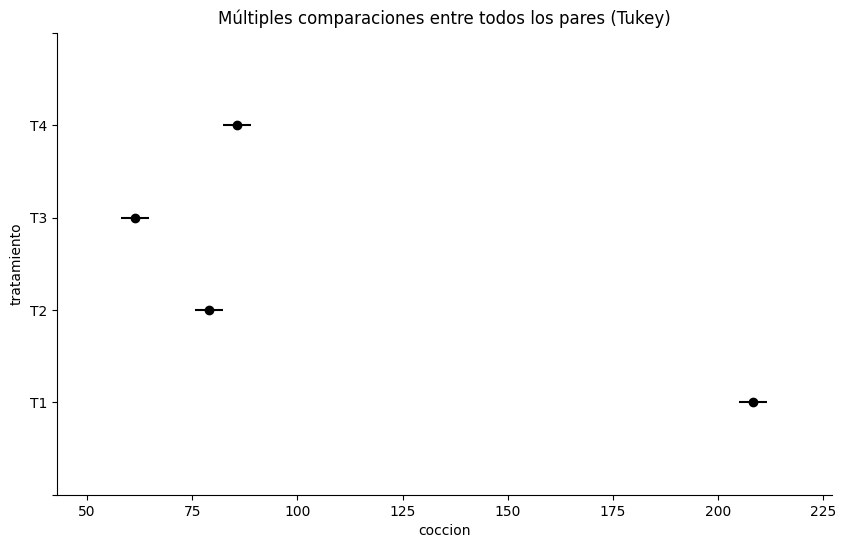

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['coccion'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="coccion")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Hay diferencia significativa entre tratamientos. Asi pues como hemos analizado el tratamiento 3 ( es remojar en agua con sal común) es más factible ya que su tiempo de coccion es menor

In [22]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.995


4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [23]:
import pandas as pd
from io import StringIO

datos = '''
temperatura,resultados
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,temperatura,resultados
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('resultados ~ C(temperatura)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(temperatura),4.0,3411.8,852.950000,68.054521,1.963480e-09
Residual,15.0,188.0,12.533333,NaN,NaN


Se rechaza Ho, por lo tanto hay relacion entre variables

In [25]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.7785351257478148


No se rechaza Ho, por lo tanto hay normalidad

In [26]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['temperatura'] == '20°C']['resultados']
grupo2 = df[df['temperatura'] == '40°C']['resultados']
grupo3 = df[df['temperatura'] == '60°C']['resultados']
grupo4 = df[df['temperatura'] == '80°C']['resultados']
grupo5 = df[df['temperatura'] == '100°C']['resultados']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.6159602096484009


No se rechaza Ho, por lo tanto hay homoscedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0 -43.4801 -28.0199   True
 100°C   40°C    -34.0    0.0 -41.7301 -26.2699   True
 100°C   60°C    -28.0    0.0 -35.7301 -20.2699   True
 100°C   80°C    -19.0    0.0 -26.7301 -11.2699   True
  20°C   40°C     1.75 0.9535  -5.9801   9.4801  False
  20°C   60°C     7.75 0.0493   0.0199  15.4801   True
  20°C   80°C    16.75 0.0001   9.0199  24.4801   True
  40°C   60°C      6.0 0.1696  -1.7301  13.7301  False
  40°C   80°C     15.0 0.0002   7.2699  22.7301   True
  60°C   80°C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

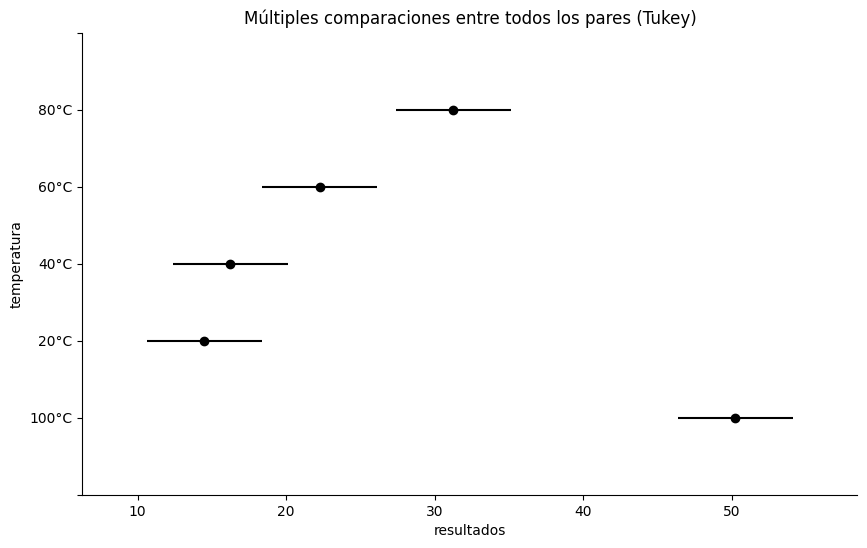

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['resultados'], groups=df['temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="temperatura", xlabel="resultados")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El deterioro es más bajo con las temperaturas 20°C, 40°C, 60°C. Es recomendable no exponer el producto a temperaturas mayores a los 60°C

In [28]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(temperatura)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.948


5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [29]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,producto_defectuoso
con_tratam,5.3
con_tratam,4.0
con_tratam,4.0
con_tratam,4.0
con_tratam,2.6
con_tratam,2.1
con_tratam,5.1
con_tratam,4.1
con_tratam,4.1
con_tratam,3.2
con_tratam,5.1
con_tratam,2.2
con_tratam,4.1
sin_tratam,8.0
sin_tratam,13.2
sin_tratam,7.2
sin_tratam,8.2
sin_tratam,9.1
sin_tratam,6.7
sin_tratam,12.6
sin_tratam,16.3
sin_tratam,9.2
sin_tratam,6.4
sin_tratam,7.2
sin_tratam,17.2
sin_tratam,12.3
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,tratamiento,producto_defectuoso
0,con_tratam,5.3
1,con_tratam,4.0
2,con_tratam,4.0
3,con_tratam,4.0
4,con_tratam,2.6
5,con_tratam,2.1
6,con_tratam,5.1
7,con_tratam,4.1
8,con_tratam,4.1
9,con_tratam,3.2


In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('producto_defectuoso ~ C(tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,269.449615,269.449615,37.102806,0.000003
Residual,24.0,174.293846,7.262244,NaN,NaN


Se rechaza Ho, por lo tanto si hay relacion entre variables

In [31]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.08240142335256262


No se rechaza Ho, por lo tanto si hay normalidad

In [32]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'con_tratam']['producto_defectuoso']
grupo2 = df[df['tratamiento'] == 'sin_tratam']['producto_defectuoso']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.006953158590874458


Se rechaza Ho, por lo tanto hay heteroscedasticidad

Lambda óptimo: -0.053872277136152676


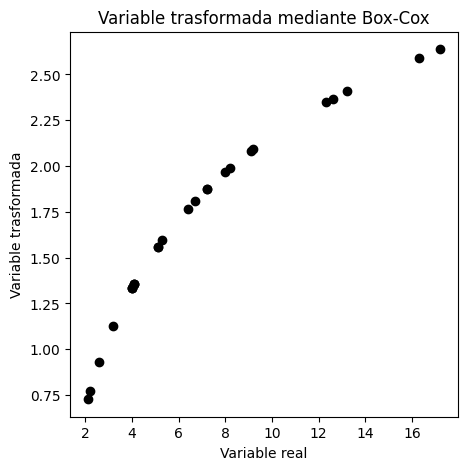

In [33]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["producto_defectuoso_boxcox"], lambda_opt = boxcox(df["producto_defectuoso"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["producto_defectuoso"], df["producto_defectuoso_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [34]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('producto_defectuoso_boxcox ~ C(tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables, grupos iguales
#Hi: si hay relación entre variables, al menos un grupo es diferente
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,5.040324,5.040324,58.843753,6.583032e-08
Residual,24.0,2.055745,0.085656,NaN,NaN


Se rechaza Ho, por lo tanto hay relacion entre variables

In [35]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.585508952669193


No se rechaza Ho, por lo tanto hay normalidad.

In [36]:
from scipy.stats import levene
# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'con_tratam']['producto_defectuoso_boxcox']
grupo2 = df[df['tratamiento'] == 'sin_tratam']['producto_defectuoso_boxcox']
stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05
#ya se cumplio ahora ambos supuestos, la normalidad y la homoscedasticidad para
#saber que anova esta en lo cierto y si hay relacion entre las variables

p-valor de Levene: 0.5435742366568765


No se rechaza Ho, ahora ya hay homoscedasticidad

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
con_tratam sin_tratam   0.8806   0.0 0.6437 1.1175   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

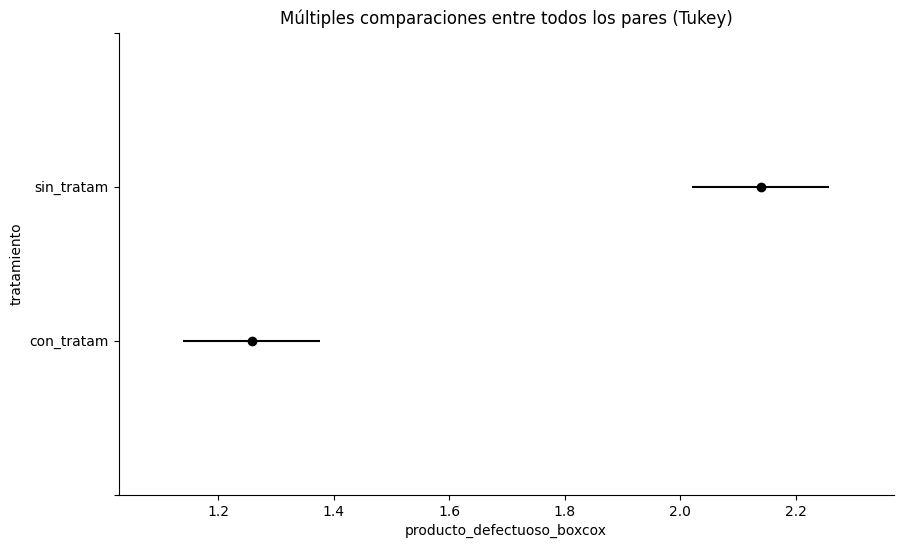

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['producto_defectuoso_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="producto_defectuoso_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Los tratamientos tienen diferencia significativa, ademas es más recomendable aplicar el tratamiento propuesto  para reducir el porcentaje de productos defectuosos

In [38]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.710


6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [39]:
import pandas as pd
from io import StringIO

datos = '''
almidon,dureza
%2,4.3
%2,5.2
%2,4.8
%2,4.5
%5,6.5
%5,7.3
%5,6.9
%5,6.1
%10,9.0
%10,7.8
%10,8.5
%10,8.1
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,almidon,dureza
0,%2,4.3
1,%2,5.2
2,%2,4.8
3,%2,4.5
4,%5,6.5
5,%5,7.3
6,%5,6.9
7,%5,6.1
8,%10,9.0
9,%10,7.8


In [40]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('dureza ~ C(almidon)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(almidon),2.0,26.726667,13.363333,58.101449,0.000007
Residual,9.0,2.070000,0.230000,NaN,NaN


Se rechaza Ho, por lo tanto si hay relacion entre variables

In [41]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.4295206808037123


No se rechaza Ho, por lo tanto si hay normalidad

In [42]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['almidon'] == '%2']['dureza']
grupo2 = df[df['almidon'] == '%5']['dureza']
grupo3 = df[df['almidon'] == '%10']['dureza']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.771773370798543


No se rechaza Ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   %10     %2    -3.65    0.0 -4.5968 -2.7032   True
   %10     %5    -1.65 0.0023 -2.5968 -0.7032   True
    %2     %5      2.0 0.0006  1.0532  2.9468   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

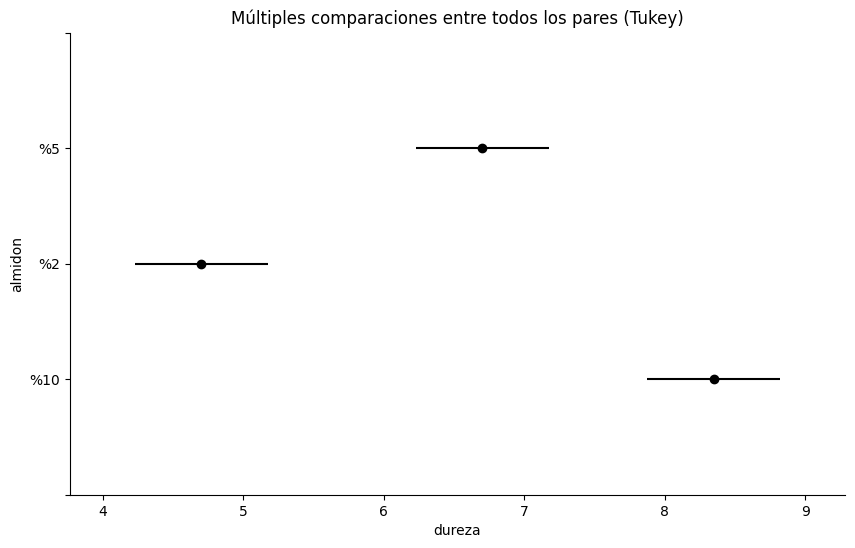

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="almidon", xlabel="dureza")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

En base a los resultados, es más conveniente usar un porcentaje de almidon de 10%, ya que su dureza es mayor.

In [44]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(almidon)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.928


7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [45]:
import pandas as pd
from io import StringIO

datos = '''
niveles_nitrogeno,rendimientos
N1,14.823
N1,14.676
N1,14.720
N1,14.5141
N1,15.065
N2,25.151
N2,25.401
N2,25.131
N2,25.031
N2,25.267
N3,32.605
N3,32.460
N3,32.256
N3,32.669
N3,32.111
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,niveles_nitrogeno,rendimientos
0,N1,14.8230
1,N1,14.6760
2,N1,14.7200
3,N1,14.5141
4,N1,15.0650
5,N2,25.1510
6,N2,25.4010
7,N2,25.1310
8,N2,25.0310
9,N2,25.2670


In [46]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('rendimientos ~ C(niveles_nitrogeno)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay diferencia entre grupos, no hay relacion entre rendimientos y niveles de nitrogeno
#Hi: si hay diferencia entre grupos, hay relacion entre rendimientos y niveles de nitrogeno
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(niveles_nitrogeno),2.0,788.340773,394.170387,10131.619332,4.298250e-20
Residual,12.0,0.466860,0.038905,NaN,NaN


Se rechaza Ho, por lo tanto hay diferencia entre grupos y hay relacion entre rendimientos y niveles de nitrogeno

In [47]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.8890610190283172


No se rechaza Ho, si hay normalidad

In [48]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['niveles_nitrogeno'] == 'N1']['rendimientos']
grupo2 = df[df['niveles_nitrogeno'] == 'N2']['rendimientos']
grupo3 = df[df['niveles_nitrogeno'] == 'N3']['rendimientos']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.5977763142684792


No se rechaza Ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    N1     N2  10.4366   0.0 10.1038 10.7694   True
    N1     N3  17.6606   0.0 17.3278 17.9934   True
    N2     N3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

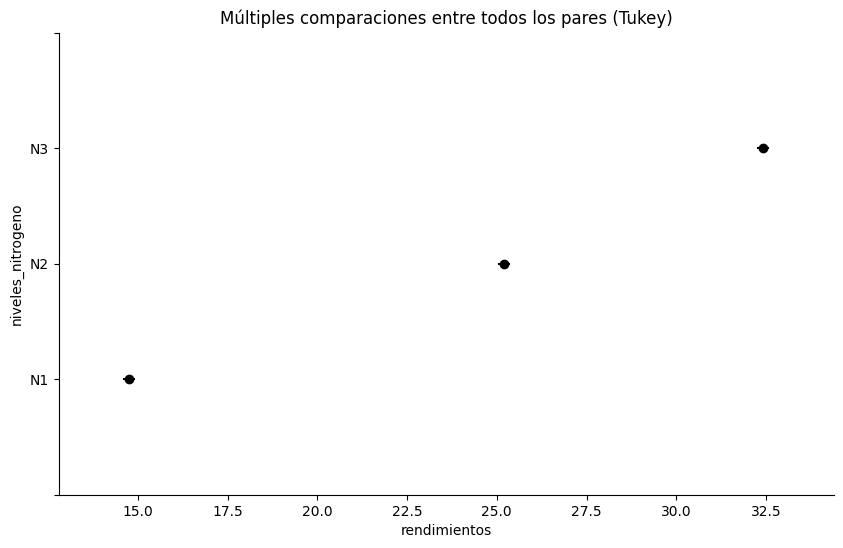

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimientos'], groups=df['niveles_nitrogeno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="niveles_nitrogeno", xlabel="rendimientos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Hay diferencia significativa entre los tres niveles de nitrogeno. Y es recomendable el nivel de nitrogeno numero 3 para mayor rendimiento.

In [50]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(niveles_nitrogeno)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.999


8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [51]:
import pandas as pd
from io import StringIO

datos = '''
aglutinante,friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,aglutinante,friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [52]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('friabilidad ~ C(aglutinante)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay diferencia entre grupos, no hay relacion entre friabilidad y aglutinante
#Hi: si hay diferencia entre grupos, hay relacion entre friabilidad y aglutinante
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(aglutinante),2.0,292.920971,146.460485,4420.972597,6.198213e-18
Residual,12.0,0.397543,0.033129,NaN,NaN


Se rechaza Ho, si hay diferencia entre grupos y hay relacion entre friabilidad y aglutinante

In [53]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.42143454193876007


No se rechaza Ho, si hay normalidad

In [54]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['aglutinante'] == 'PVP']['friabilidad']
grupo2 = df[df['aglutinante'] == 'CMC']['friabilidad']
grupo3 = df[df['aglutinante'] == 'Gre']['friabilidad']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.8018412374552168


No se rechaza Ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

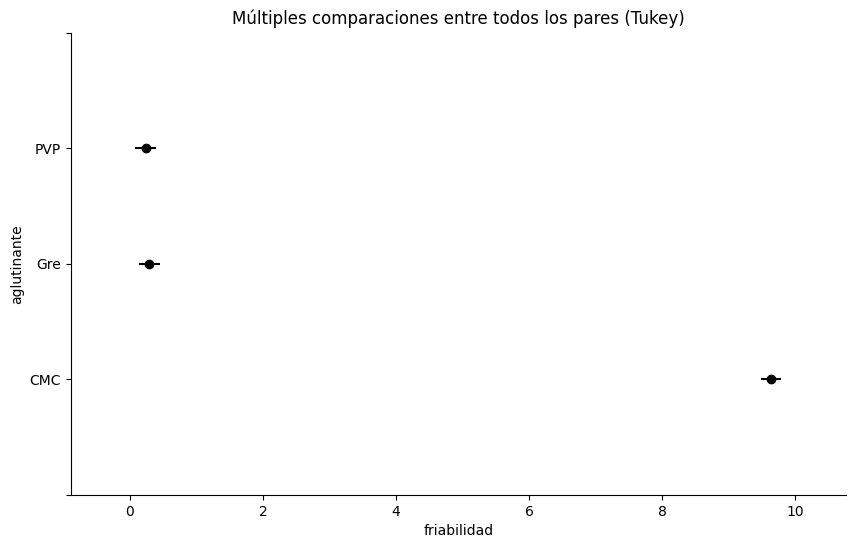

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['friabilidad'], groups=df['aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="aglutinante", xlabel="friabilidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El aglutinante PVP y Gre no tienen diferencia significativa pero CMC si la tiene. Es recomendable aplicar CMC para mayor friabilidad y si no se desea tanta friabilidad aplicar el aglutinante PVP

In [56]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(aglutinante)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.999


9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [57]:
import pandas as pd
from io import StringIO

datos = '''
clona,azucares_reductores_totales
C1,8.69
C1,6.68
C1,6.83
C1,6.43
C1,10.30
C2,8.00
C2,16.41
C2,12.43
C2,10.99
C2,15.53
C3,17.39
C3,13.73
C3,15.62
C3,17.05
C3,15.42
C4,10.37
C4,9.16
C4,8.83
C4,4.40
C4,10.38
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,clona,azucares_reductores_totales
0,C1,8.69
1,C1,6.68
2,C1,6.83
3,C1,6.43
4,C1,10.30
5,C2,8.00
6,C2,16.41
7,C2,12.43
8,C2,10.99
9,C2,15.53


In [58]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('azucares_reductores_totales ~ C(clona)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay diferencia entre grupos, no hay relacion entre azucares y clonas
#Hi: si hay diferencia entre grupos, hay relacion entre azucares y clonas
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(clona),3.0,209.90716,69.969053,12.327073,0.000198
Residual,16.0,90.81676,5.676048,NaN,NaN


Se rechaza Ho, si hay diferencia entre grupos, hay relacion entre azucares y clonas

In [59]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.7677173153296


No se rechaza Ho, hay normalidad

In [60]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['clona'] == 'C1']['azucares_reductores_totales']
grupo2 = df[df['clona'] == 'C2']['azucares_reductores_totales']
grupo3 = df[df['clona'] == 'C3']['azucares_reductores_totales']
grupo4 = df[df['clona'] == 'C4']['azucares_reductores_totales']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.4290096340206233


No se rechaza ho, entonces hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C1     C2    4.886 0.0237   0.575  9.197   True
    C1     C3    8.056 0.0003   3.745 12.367   True
    C1     C4    0.842 0.9428  -3.469  5.153  False
    C2     C3     3.17 0.1939  -1.141  7.481  False
    C2     C4   -4.044 0.0699  -8.355  0.267  False
    C3     C4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

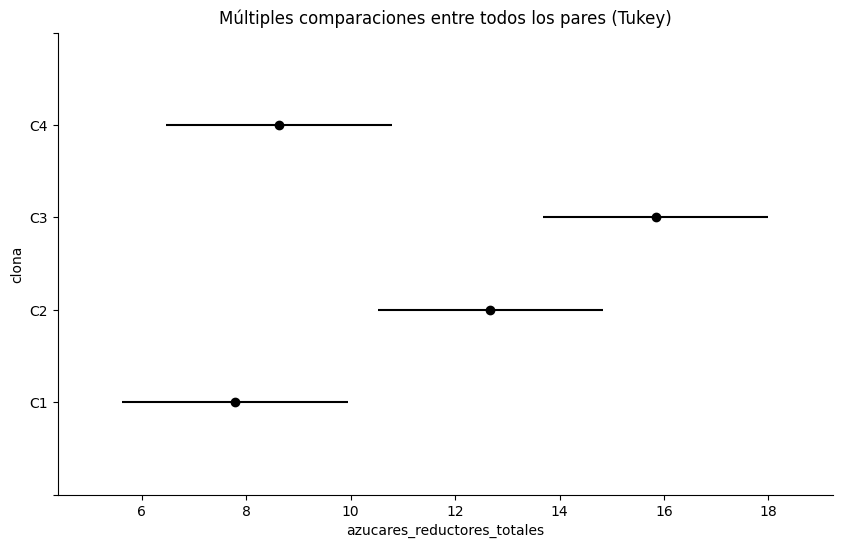

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['azucares_reductores_totales'], groups=df['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="clona", xlabel="azucares_reductores_totales")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El clona 1 y 4 no tienen diferencia significativa, aunque los mejores clonas son el 2 y 3. Es mejor usar el clona 3 porque presenta mayor numero de azucares reductores y responde mejor.

In [62]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(clona)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.698


10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [63]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,cometas
ct,5.30
ct,4.03
ct,4.00
ct,2.56
ct,5.06
ct,4.06
ct,2.08
ct,4.03
ct,2.04
ct,1.18
st,8.02
st,13.18
st,7.15
st,9.11
st,8.23
st,16.3
st,9.20
st,6.35
st,7.15
st,8.66
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df

,tratamiento,cometas
0,ct,5.30
1,ct,4.03
2,ct,4.00
3,ct,2.56
4,ct,5.06
5,ct,4.06
6,ct,2.08
7,ct,4.03
8,ct,2.04
9,ct,1.18


In [64]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('cometas ~ C(tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay diferencia entre grupos, no hay relacion entre cometas y tratamientos
#Hi: si hay diferencia entre grupos, hay relacion entre cometas y tratamientos
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,174.109005,174.109005,30.605669,0.00003
Residual,18.0,102.398090,5.688783,NaN,NaN


se rechaza Ho, por lo tanto hay diferencia entre grupos y tambien hay relacion entre cometas y tratamientos

In [65]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.013152795271816857


Se rechaza Ho, por lo tanto no hay normalidad en los residuales

In [66]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'ct']['cometas']
grupo2 = df[df['tratamiento'] == 'st']['cometas']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.30433662983094306


No se rechaza Ho, hay homoscedasticidad

Lambda óptimo: 0.32061169162391906


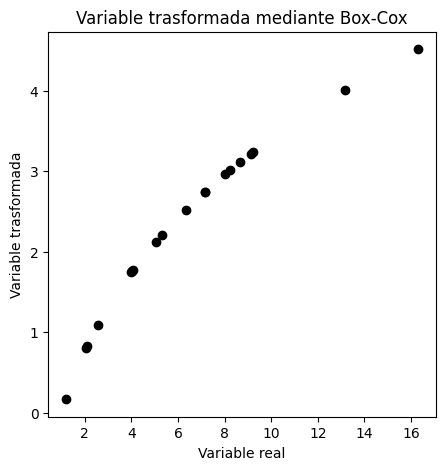

In [67]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["cometas_boxcox"], lambda_opt = boxcox(df["cometas"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["cometas"], df["cometas_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [68]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('cometas_boxcox ~ C(tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables, grupos iguales
#Hi: si hay relación entre variables, al menos un grupo es diferente
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,15.859834,15.859834,38.91081,0.000007
Residual,18.0,7.336702,0.407595,NaN,NaN


Se rechaza Ho, por lo tanto hay diferencia entre grupos, relacion entre variables

In [69]:
from scipy.stats import shapiro
_, valor_p_sh = shapiro(modelo_lineal.resid)
print("valor_p shapiro =", valor_p_sh)
#Ho: si hay normalidad
#Hi: no hay normalidad
#alpha= 0.05

valor_p shapiro = 0.9455348310737177


No se rechaza Ho, por lo tanto ya hay normalidad

In [70]:
from scipy.stats import levene
# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'ct']['cometas_boxcox']
grupo2 = df[df['tratamiento'] == 'st']['cometas_boxcox']
stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05
#ya se cumplio ahora ambos supuestos, la normalidad y la homoscedasticidad para
#saber que anova esta en lo cierto y si hay relacion entre las variables

p-valor de Levene: 0.700897370037938


No se rechaza Ho, por lo tanto hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    ct     st    1.781   0.0 1.1812 2.3808   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

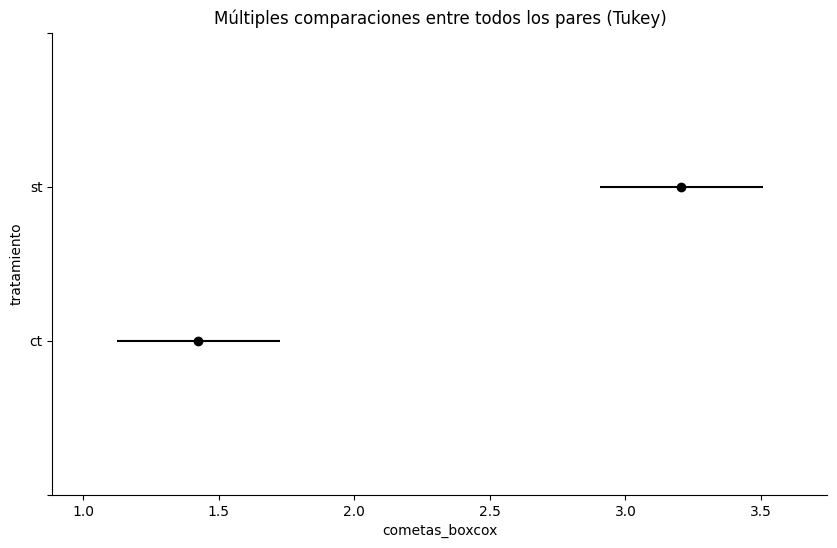

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['cometas_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tratamiento", xlabel="cometas_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Podemos ver que ambos tratamientos tienen diferencia significativa, es por ello que se recomienda aplicar el tratamiento para reducir las cometas.

In [72]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.684
